In [14]:
import numpy as np
from sklearn import metrics
from sklearn import model_selection
import cv2

from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.metrics import confusion_matrix

In [12]:
dataset = np.load('dataset.npy')
Y_train = np.load('y_train.npy')

In [17]:
filterSize =(16,16)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)
# Reading the image named 'input.jpg'
input_image = dataset[733][7][:, 15, :]*255
  
# Applying the Black-Hat operation
tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_BLACKHAT,kernel)
edges = canny(tophat_img)
plt.imshow(tophat_img, cmap="gray", origin="lower")
plt.show()

IndexError: invalid index to scalar variable.

In [35]:
dataset.shape

(33880, 193)

In [36]:
dataset = dataset[:,1:]
dataset.shape

(33880, 192)

In [29]:
len(dataset_nb[0])

192

In [37]:
classifier = RandomForestClassifier(criterion = "gini", n_estimators = 5, min_samples_split = 5, max_features =15, oob_score = True)

In [38]:
classifier.fit(dataset_nb, Y_train)

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=15, min_samples_split=5, n_estimators=5,
                       oob_score=True)

In [24]:
Y_train.shape

(33880, 1)

In [25]:
dataset_nb

AttributeError: 'list' object has no attribute 'shape'

In [55]:
len(dataset)

33880

In [60]:
predictions = classifier.predict_proba(dataset)
predictions[:,1]

array([0.8, 1. , 1. , ..., 0. , 0. , 0. ])

In [61]:
predictions = (classifier.predict_proba(dataset)[:,1] >= 0.5)
Y_train=Y_train.reshape((len(Y_train),1))
print(confusion_matrix(Y_train, predictions))

[[16491     9]
 [    5 17375]]


In [11]:
Y_test = np.load('y_test.npy')

In [12]:
np.shape(Y_test)

(84070,)

In [4]:
len(Y_test)

84070

In [14]:
dataset[0][189]

0.0

In [14]:
dataset[0][1]

0.014298134483397007

In [4]:
list_brain = []
for i in range(dataset.shape[0]):
    list_brain.append(dataset[i][0])
print(set(list_brain))

{1183.0, 2208.0, 1448.0, 2733.0, 1070.0, 430.0, 46.0, 6324.0, 5568.0, 1477.0, 1224.0, 1873.0, 4689.0, 2777.0, 4442.0, 1243.0, 1242.0, 2396.0, 4837.0, 4968.0, 4848.0, 3318.0, 4602.0, 891.0, 1535.0}


In [17]:
set_brain = list(set(list_brain))
def partition(list_brain, n):
    random.shuffle(list_brain)
    print(list_brain)
    result = []
    for i in range(0, len(list_brain), n):
        result.append(list_brain[i:i + n])
    return result

ret = partition(set_brain, 5)
ret

[891.0, 4837.0, 1535.0, 4689.0, 2396.0, 1243.0, 1070.0, 1448.0, 1477.0, 1873.0, 2777.0, 1242.0, 1224.0, 4848.0, 46.0, 4442.0, 4968.0, 430.0, 1183.0, 3318.0, 2208.0, 5568.0, 6324.0, 2733.0, 4602.0]


[[891.0, 4837.0, 1535.0, 4689.0, 2396.0],
 [1243.0, 1070.0, 1448.0, 1477.0, 1873.0],
 [2777.0, 1242.0, 1224.0, 4848.0, 46.0],
 [4442.0, 4968.0, 430.0, 1183.0, 3318.0],
 [2208.0, 5568.0, 6324.0, 2733.0, 4602.0]]

In [3]:
cv_1_data = []
cv_2_data = []
cv_3_data = []
cv_4_data = []
cv_5_data = []
cv_1_idx = []
cv_2_idx = []
cv_3_idx = []
cv_4_idx = []
cv_5_idx = []
cv_1_brains = [1183, 2208, 1448, 2733, 1070]
cv_2_brains = [430, 46, 6324, 5568, 1477]
cv_3_brains = [1224, 1873, 4689, 2777, 4442]
cv_4_brains = [1243, 1242, 2396, 4837, 4968]
cv_5_brains = [4848, 3318, 4602, 891, 1535]
cv_1_train = []
cv_2_train = []
cv_3_train = []
cv_4_train = []
cv_5_train = []
for i in range(dataset.shape[0]):
    if dataset[i][0] in cv_1_brains:
        cv_1_idx.append(i)
        cv_1_data.append(np.delete(dataset[i], 0))
        cv_1_train.append(Y_train[i])
    elif dataset[i][0] in cv_2_brains:
        cv_2_idx.append(i)
        cv_2_data.append(np.delete(dataset[i], 0))
        cv_2_train.append(Y_train[i])
    elif dataset[i][0] in cv_3_brains:
        cv_3_idx.append(i)
        cv_3_data.append(np.delete(dataset[i], 0))
        cv_3_train.append(Y_train[i])
    elif dataset[i][0] in cv_4_brains:
        cv_4_idx.append(i)
        cv_4_data.append(np.delete(dataset[i], 0))
        cv_4_train.append(Y_train[i])
    elif dataset[i][0] in cv_5_brains:
        cv_5_idx.append(i)
        cv_5_data.append(np.delete(dataset[i], 0))
        cv_5_train.append(Y_train[i])

In [4]:
dataset_new = np.concatenate([cv_1_data, cv_2_data, cv_3_data, cv_4_data, cv_5_data])
dataset_new.shape

(33880, 192)

In [7]:
Y_train.shape

(33882,)

In [18]:
set(cv_5_train)

{0, 1}

In [34]:
# tree convergence
accuracy_list = []
no_trees = [50, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
for i in no_trees:
    from sklearn.ensemble import RandomForestClassifier
    #max features, min sample split 
    clf = RandomForestClassifier(n_estimators = i, max_features = 'sqrt', min_samples_split = 2, criterion = 'gini', oob_score = True, bootstrap = True, random_state = 30)
    clf.fit(dataset_new, Y_train)
    y_pred = (clf.oob_decision_function_[:,1] >= 0.50).astype(bool)
    accuracy = metrics.accuracy_score(Y_train, y_pred)
    accuracy_list.append(accuracy)

In [38]:
accuracy_list

[0.8364323239478189,
 0.8449324124904078,
 0.8496841980992857,
 0.8507762233634378,
 0.8522224189835311,
 0.8534620152293253,
 0.8526651319284576,
 0.8523699899651732,
 0.853166873266041,
 0.8533439584440116]

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

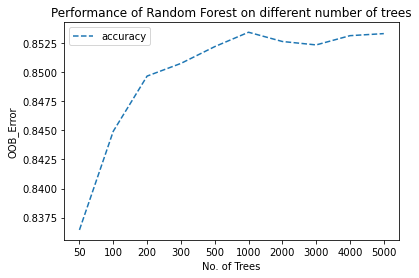

In [37]:
index = np.arange(0,10)
no_trees = [50, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
plt.plot(index, accuracy_list, label = "accuracy", linestyle="--")
plt.xlabel('No. of Trees')
plt.ylabel('OOB_Error')
plt.xticks(index, no_trees)
plt.title('Performance of Random Forest on different number of trees')
plt.legend()
plt.fig()

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
# Number of trees in Random Forest
n_estimators = 20

# Number of features to consider at every split
rf_max_features = ['sqrt', 9, 10, 11, 12, 13, 14,15, 16, 17, 18, 19, 20]

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 20, 19)]

# Create the grid
rf_grid = {'criterion' : ["gini"],
'n_estimators': [n_estimators],
'bootstrap': [True],
'oob_score': [True],
'max_features': rf_max_features,
'min_samples_split': rf_min_samples_split}

# Custom CV splits
cv_splits = [(cv_1_idx, cv_1_train), (cv_2_idx, cv_2_train), (cv_3_idx, cv_3_train), (cv_4_idx, cv_4_train), (cv_5_idx, cv_5_train)]

def custom_oob_score(estimator, cv_data, cv_train):
    return estimator.oob_score_

scoring_list = {
'oob_error': custom_oob_score,
}

# Add trees here
rf_base = RandomForestClassifier(random_state = 42)

# Create the random search Random Forest
rf_random = model_selection.RandomizedSearchCV(estimator = rf_base, scoring = scoring_list, param_distributions = rf_grid, refit = 'oob_error', cv = cv_splits, verbose = 3, n_iter = 5)
# Fit the random search model
rf_random.fit(dataset_new, Y_train)
# View the best parameters from the random search
print(rf_random.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_features=17, min_samples_split=7, n_estimators=20, oob_score=True; oob_error: (test=0.863) total time=   0.6s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, criterion=gini, max_features=17, min_samples_split=7, n_estimators=20, oob_score=True; oob_error: (test=0.923) total time=   1.5s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, criterion=gini, max_features=17, min_samples_split=7, n_estimators=20, oob_score=True; oob_error: (test=0.876) total time=   1.5s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, criterion=gini, max_features=17, min_samples_split=7, n_estimators=20, oob_score=True; oob_error: (test=0.939) total time=   0.6s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, criterion=gini, max_features=17, min_samples_split=7, n_estimators=20, oob_score=True; oob_error: (test=0.806) total time=   0.9s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=19, n_estimators=20, oob_score=True; oob_error: (test=0.850) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=19, n_estimators=20, oob_score=True; oob_error: (test=0.924) total time=   0.9s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=19, n_estimators=20, oob_score=True; oob_error: (test=0.875) total time=   0.8s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=19, n_estimators=20, oob_score=True; oob_error: (test=0.934) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=19, n_estimators=20, oob_score=True; oob_error: (test=0.796) total time=   0.5s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=2, n_estimators=20, oob_score=True; oob_error: (test=0.844) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=2, n_estimators=20, oob_score=True; oob_error: (test=0.921) total time=   0.9s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=2, n_estimators=20, oob_score=True; oob_error: (test=0.867) total time=   0.9s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=2, n_estimators=20, oob_score=True; oob_error: (test=0.938) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=2, n_estimators=20, oob_score=True; oob_error: (test=0.785) total time=   0.5s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=13, n_estimators=20, oob_score=True; oob_error: (test=0.851) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=13, n_estimators=20, oob_score=True; oob_error: (test=0.922) total time=   0.9s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=13, n_estimators=20, oob_score=True; oob_error: (test=0.873) total time=   1.1s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=13, n_estimators=20, oob_score=True; oob_error: (test=0.937) total time=   0.3s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, criterion=gini, max_features=9, min_samples_split=13, n_estimators=20, oob_score=True; oob_error: (test=0.793) total time=   0.5s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=19, min_samples_split=3, n_estimators=20, oob_score=True; oob_error: (test=0.850) total time=   0.7s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, criterion=gini, max_features=19, min_samples_split=3, n_estimators=20, oob_score=True; oob_error: (test=0.929) total time=   1.8s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, criterion=gini, max_features=19, min_samples_split=3, n_estimators=20, oob_score=True; oob_error: (test=0.870) total time=   1.8s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, criterion=gini, max_features=19, min_samples_split=3, n_estimators=20, oob_score=True; oob_error: (test=0.938) total time=   0.8s


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, criterion=gini, max_features=19, min_samples_split=3, n_estimators=20, oob_score=True; oob_error: (test=0.802) total time=   1.1s
{'oob_score': True, 'n_estimators': 20, 'min_samples_split': 7, 'max_features': 17, 'criterion': 'gini', 'bootstrap': True}


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [22]:
rf_random.best_params_

{'oob_score': True,
 'n_estimators': 20,
 'min_samples_split': 7,
 'max_features': 17,
 'criterion': 'gini',
 'bootstrap': True}

In [39]:
clf = RandomForestClassifier()
clf.set_params(**rf_random.best_params_)

RandomForestClassifier(max_features=20, min_samples_split=8, n_estimators=20,
                       oob_score=True)

In [9]:
clf = RandomForestClassifier(criterion = "gini", n_estimators = 50, min_samples_split = 5, max_features =15, oob_score = True)

In [40]:
clf.fit(dataset, Y_train)

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=20, min_samples_split=8, n_estimators=20,
                       oob_score=True)

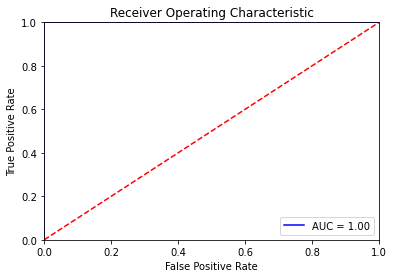

In [26]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(dataset)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[2901  121]
 [  43  917]]


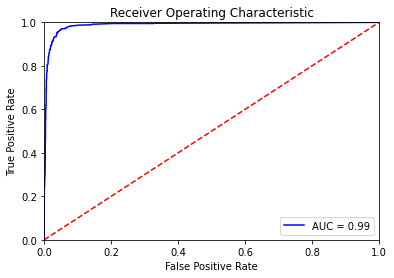

[[3330  233]
 [ 416 5314]]


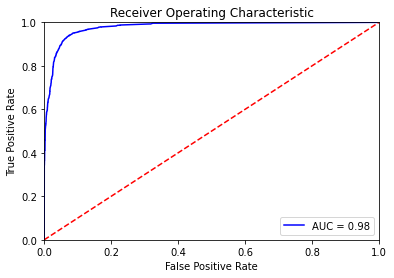

[[3500  167]
 [ 762 5478]]


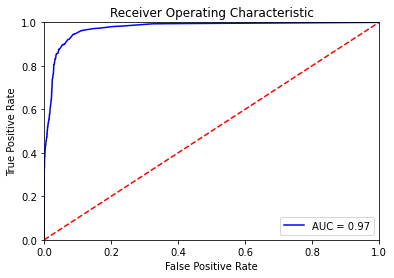

[[2802  183]
 [ 127 1233]]


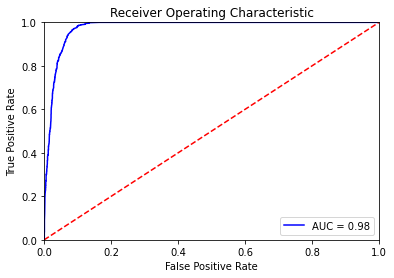

[[3065  200]
 [   0 3090]]


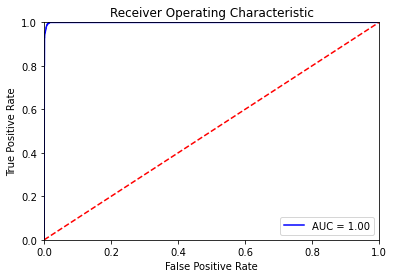

In [37]:
# Define cv
cv_splits = [(np.concatenate([cv_2_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_1_idx), 
             (np.concatenate([cv_1_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_2_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_4_idx, cv_5_idx]), cv_3_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_5_idx]), cv_4_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_4_idx]), cv_5_idx)]


# Run classifier with cross-validation and plot ROC curves
#classifier = RandomForestClassifier(criterion = "gini", n_estimators = 20, min_samples_leaf = 9, min_samples_split = 2, max_features =20, oob_score = True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv_splits):
    # calculate the fpr and tpr for all thresholds of the classification
    clf = RandomForestClassifier(criterion = "gini", bootstrap = True, n_estimators = 50, min_samples_split = 5, max_features =15, oob_score = True)
    clf.fit(dataset[train],Y_train[train])
    probs = clf.predict_proba(dataset[test])
    preds = (probs[:,1]>= 0.15).astype(bool)
    fpr, tpr, threshold = metrics.roc_curve(Y_train[test], probs[:,1])
    print(confusion_matrix(Y_train[test], preds))
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [13]:
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()

    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):

        # Take column at xth index.
        col = df.iloc[:, x]

        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):

            # Take column at yth index.
            otherCol = df.iloc[:, y]

            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])

    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)
getDuplicateColumns(dataset_pd)

TypeError: 'list' object is not callable

In [5]:
dataset_pd['WM']

NameError: name 'dataset_pd' is not defined

In [18]:
list = ['min_T1', 'min_T1','med_T1', 'mid_T1', 'mid_vsmall_ratio_T1', 'mid_small_ratio_T1', 'mid_med_ratio_T1', 'mid_large_ratio_T1', 'mid_vsmall_ratio_T1_inc', 'mid_small_ratio_T1_inc', 'mid_med_ratio_T1_inc', 'mid_large_ratio_T1_inc', 'mean_T1', 'max_T1', 'var_T1','range_T1', 'H_T1_e1', 'H_T1_e2', 'H_T1_e3', 'min_FLAIR', 'mid_FLAIR', 'med_FLAIR', 'mid_vsmall_ratio_FLAIR', 'mid_small_ratio_FLAIR', 'mid_med_ratio_FLAIR', 'mid_large_ratio_FLAIR', 'mid_vsmall_ratio_FLAIR_inc', 'mid_small_ratio_FLAIR_inc', 'mid_med_ratio_FLAIR_inc', 'mid_large_ratio_FLAIR_inc','mean_FLAIR', 'max_FLAIR', 'var_FLAIR','range_FLAIR','H_FLAIR_e1', 'H_FLAIR_e2', 'H_FLAIR_e3','density_diff', 'sum_soft_tiss_binary', 'sum_percent_soft_tiss', 'min_st', 'med_st', 'mid_st', 'mid_vsmall_ratio_st', 'mid_small_ratio_st','mid_med_ratio_st', 'mid_large_ratio_st', 'mid_vsmall_ratio_st_inc','mid_small_ratio_st_inc', 'mid_med_ratio_st_inc', 'mid_large_ratio_st_inc', 'mean_st', 'max_st', 'var_st','range_st','H_st_e1', 'H_st_e2', 'H_st_e3','min_stm', 'med_stm', 'mid_stm', 'mid_vsmall_ratio_stm', 'mid_small_ratio_stm','mid_med_ratio_stm', 'mid_large_ratio_stm', 'mid_vsmall_ratio_stm_inc','mid_small_ratio_stm_inc', 'mid_med_ratio_stm_inc', 'mid_large_ratio_stm_inc', 'mean_stm', 'max_stm','var_stm','range_stm', 'H_stm_e1', 'H_stm_e2', 'H_stm_e3','min_th_T1', 'med_th_T1', 'mid_th_T1', 'mid_vsmall_ratio_th_T1', 'mid_small_ratio_th_T1', 'mid_med_ratio_th_T1', 'mid_large_ratio_th_T1', 'mid_vsmall_ratio_th_T1_inc', 'mid_small_ratio_th_T1_inc', 'mid_med_ratio_th_T1_inc', 'mid_large_ratio_th_T1_inc', 'mean_th_T1', 'max_th_T1', 'var_th_T1','range_th_T1','H_th_T1_e1', 'H_th_T1_e2', 'H_th_T1_e3','min_th_FLAIR', 'med_th_FLAIR', 'mid_th_FLAIR', 'mid_vsmall_ratio_th_FLAIR', 'mid_small_ratio_th_FLAIR', 'mid_med_ratio_th_FLAIR', 'mid_large_ratio_th_FLAIR', 'mid_vsmall_ratio_th_FLAIR_inc', 'mid_small_ratio_th_FLAIR_inc', 'mid_med_ratio_th_FLAIR_inc', 'mid_large_ratio_th_FLAIR_inc', 'mean_th_FLAIR', 'max_th_FLAIR', 'var_th_FLAIR','range_th_FLAIR','H_th_FLAIR_e1', 'H_th_FLAIR_e2', 'H_th_FLAIR_e3','min_th_st', 'med_th_st', 'mid_th_st', 'mid_vsmall_ratio_th_st','mid_small_ratio_th_st', 'mid_med_ratio_th_st', 'mid_large_ratio_th_st', 'mid_vsmall_ratio_th_st_inc','mid_small_ratio_th_st_inc', 'mid_med_ratio_th_st_inc', 'mid_large_ratio_th_st_inc', 'mean_th_st', 'max_th_st','var_th_st','range_th_st', 'H_th_st_e1', 'H_th_st_e2', 'H_th_st_e3','min_bh_T1', 'med_bh_T1', 'mid_bh_T1', 'mid_vsmall_ratio_bh_T1','mid_small_ratio_bh_T1', 'mid_med_ratio_bh_T1', 'mid_large_ratio_bh_T1', 'mid_vsmall_ratio_bh_T1_inc','mid_small_ratio_bh_T1_inc', 'mid_med_ratio_bh_T1_inc', 'mid_large_ratio_bh_T1_inc', 'mean_bh_T1', 'max_bh_T1', 'var_bh_T1','range_bh_T1', 'H_bh_T1_e1', 'H_bh_T1_e2', 'H_bh_T1_e3','min_bh_FLAIR', 'med_bh_FLAIR', 'mid_bh_FLAIR', 'mid_vsmall_ratio_bh_FLAIR', 'mid_small_ratio_bh_FLAIR', 'mid_med_ratio_bh_FLAIR', 'mid_large_ratio_bh_FLAIR', 'mid_vsmall_ratio_bh_FLAIR_inc', 'mid_small_ratio_bh_FLAIR_inc', 'mid_med_ratio_bh_FLAIR_inc', 'mid_large_ratio_bh_FLAIR_inc', 'mean_bh_FLAIR', 'max_bh_FLAIR','var_bh_FLAIR','range_bh_FLAIR','H_bh_FLAIR_e1', 'H_bh_FLAIR_e2', 'H_bh_FLAIR_e3','min_bh_st', 'med_bh_st', 'mid_bh_st', 'mid_vsmall_ratio_bh_st','mid_small_ratio_bh_st', 'mid_med_ratio_bh_st', 'mid_large_ratio_bh_st', 'mid_vsmall_ratio_bh_st_inc','mid_small_ratio_bh_st_inc', 'mid_med_ratio_bh_st_inc', 'mid_large_ratio_bh_st_inc', 'mean_bh_st', 'max_bh_st', 'var_bh_st','range_bh_st', 'H_bh_st_e1', 'H_bh_st_e2', 'H_bh_st_e3', 'x', 'y', 'z', 'WMH_x', 'WMH_y' , 'WMH_z', 'CSF', 'GM', 'WM']

In [21]:
set(list)

{'CSF',
 'GM',
 'H_FLAIR_e1',
 'H_FLAIR_e2',
 'H_FLAIR_e3',
 'H_T1_e1',
 'H_T1_e2',
 'H_T1_e3',
 'H_bh_FLAIR_e1',
 'H_bh_FLAIR_e2',
 'H_bh_FLAIR_e3',
 'H_bh_T1_e1',
 'H_bh_T1_e2',
 'H_bh_T1_e3',
 'H_bh_st_e1',
 'H_bh_st_e2',
 'H_bh_st_e3',
 'H_st_e1',
 'H_st_e2',
 'H_st_e3',
 'H_stm_e1',
 'H_stm_e2',
 'H_stm_e3',
 'H_th_FLAIR_e1',
 'H_th_FLAIR_e2',
 'H_th_FLAIR_e3',
 'H_th_T1_e1',
 'H_th_T1_e2',
 'H_th_T1_e3',
 'H_th_st_e1',
 'H_th_st_e2',
 'H_th_st_e3',
 'WM',
 'WMH_x',
 'WMH_y',
 'WMH_z',
 'density_diff',
 'max_FLAIR',
 'max_T1',
 'max_bh_FLAIR',
 'max_bh_T1',
 'max_bh_st',
 'max_st',
 'max_stm',
 'max_th_FLAIR',
 'max_th_T1',
 'max_th_st',
 'mean_FLAIR',
 'mean_T1',
 'mean_bh_FLAIR',
 'mean_bh_T1',
 'mean_bh_st',
 'mean_st',
 'mean_stm',
 'mean_th_FLAIR',
 'mean_th_T1',
 'mean_th_st',
 'med_FLAIR',
 'med_T1',
 'med_bh_FLAIR',
 'med_bh_T1',
 'med_bh_st',
 'med_st',
 'med_stm',
 'med_th_FLAIR',
 'med_th_T1',
 'med_th_st',
 'mid_FLAIR',
 'mid_T1',
 'mid_bh_FLAIR',
 'mid_bh_T1',
 'mid_b

In [14]:
hi = [min_T1, med_T1, mid_T1, mid_vsmall_ratio_T1, mid_small_ratio_T1, mid_med_ratio_T1, mid_large_ratio_T1, mid_vsmall_ratio_T1_inc, mid_small_ratio_T1_inc, mid_med_ratio_T1_inc, mid_large_ratio_T1_inc, mean_T1, max_T1, var_T1, range_T1, H_T1_e1, H_T1_e2, H_T1_e3, min_FLAIR, mid_FLAIR, mean_FLAIR, mid_FLAIR, mid_vsmall_ratio_FLAIR, mid_small_ratio_FLAIR, mid_med_ratio_FLAIR, mid_large_ratio_FLAIR, mid_vsmall_ratio_FLAIR_inc, mid_small_ratio_FLAIR_inc, mid_med_ratio_FLAIR_inc, mid_large_ratio_FLAIR_inc, med_FLAIR, max_FLAIR, var_FLAIR, range_FLAIR, H_FLAIR_e1, H_FLAIR_e2, H_FLAIR_e3, density_diff, sum_soft_tiss_binary, sum_percent_soft_tiss, min_st, med_st, mid_st, mid_vsmall_ratio_st, mid_small_ratio_st, mid_med_ratio_st, mid_large_ratio_st, mid_vsmall_ratio_st_inc, mid_small_ratio_st_inc, mid_med_ratio_st_inc, mid_large_ratio_st_inc, mean_st, max_st, var_st, range_st, H_st_e1, H_st_e2, H_st_e3, min_stm, med_stm, mid_stm, mid_vsmall_ratio_stm, mid_small_ratio_stm, mid_med_ratio_stm, mid_large_ratio_stm, mid_vsmall_ratio_stm_inc, mid_small_ratio_stm_inc, mid_med_ratio_stm_inc, mid_large_ratio_stm_inc, mean_stm, max_stm, var_stm, range_stm, H_stm_e1, H_stm_e2, H_stm_e3, min_th_T1, med_th_T1, mid_th_T1, mid_vsmall_ratio_th_T1, mid_small_ratio_th_T1, mid_med_ratio_th_T1, mid_large_ratio_th_T1, mid_vsmall_ratio_th_T1_inc, mid_small_ratio_th_T1_inc, mid_med_ratio_th_T1_inc, mid_large_ratio_th_T1_inc, mean_th_T1, max_th_T1, var_th_T1, range_th_T1, H_th_T1_e1, H_th_T1_e2, H_th_T1_e3, min_th_FLAIR, med_th_FLAIR, mid_th_FLAIR, mid_vsmall_ratio_th_FLAIR, mid_small_ratio_th_FLAIR, mid_med_ratio_th_FLAIR, mid_large_ratio_th_FLAIR, mid_vsmall_ratio_th_FLAIR_inc, mid_small_ratio_th_FLAIR_inc, mid_med_ratio_th_FLAIR_inc, mid_large_ratio_th_FLAIR_inc, mean_th_FLAIR, max_th_FLAIR, var_th_FLAIR, range_th_FLAIR,H_th_FLAIR_e1, H_th_FLAIR_e2, H_th_FLAIR_e3, min_th_st, med_th_st, mid_th_st, mid_vsmall_ratio_th_st, mid_small_ratio_th_st, mid_med_ratio_th_st, mid_large_ratio_th_st, mid_vsmall_ratio_th_st_inc, mid_small_ratio_th_st_inc, mid_med_ratio_th_st_inc, mid_large_ratio_th_st_inc, mean_th_st, max_th_st, var_th_st, range_th_st, H_th_st_e1, H_th_st_e2, H_th_st_e3, min_bh_T1, med_bh_T1, mid_bh_T1, mid_vsmall_ratio_bh_T1,mid_small_ratio_bh_T1, mid_med_ratio_bh_T1, mid_large_ratio_bh_T1, mid_vsmall_ratio_bh_T1_inc, mid_small_ratio_bh_T1_inc, mid_med_ratio_bh_T1_inc, mid_large_ratio_bh_T1_inc, mean_bh_T1, max_bh_T1, var_bh_T1, range_bh_T1, H_bh_T1_e1, H_bh_T1_e2, H_bh_T1_e3, min_bh_FLAIR, med_bh_FLAIR, mid_bh_FLAIR, mid_vsmall_ratio_bh_FLAIR, mid_small_ratio_bh_FLAIR, mid_med_ratio_bh_FLAIR, mid_large_ratio_bh_FLAIR, mid_vsmall_ratio_bh_FLAIR_inc, mid_small_ratio_bh_FLAIR_inc, mid_med_ratio_bh_FLAIR_inc, mid_large_ratio_bh_FLAIR_inc, mean_bh_FLAIR, max_bh_FLAIR, var_bh_FLAIR, range_bh_FLAIR, H_bh_FLAIR_e1, H_bh_FLAIR_e2, H_bh_FLAIR_e3, min_bh_st, med_bh_st, mid_bh_st, mid_vsmall_ratio_bh_st, mid_small_ratio_bh_st, mid_med_ratio_bh_st, mid_large_ratio_bh_st, mid_vsmall_ratio_bh_st_inc, mid_small_ratio_bh_st_inc, mid_med_ratio_bh_st_inc, mid_large_ratio_bh_st_inc, mean_bh_st, max_bh_st, var_bh_st, range_bh_st, H_bh_st_e1, H_bh_st_e2, H_bh_st_e3, x, y, z, WMH_x, WMH_y, WMH_z, CSF_feat, GM_feat, WM_feat]

NameError: name 'min_T1' is not defined

In [19]:
import pandas as pd
dataset_pd = pd.DataFrame(dataset_new, columns = ['min_T1', 'med_T1', 'mid_T1', 'mid_vsmall_ratio_T1', 'mid_small_ratio_T1', 'mid_med_ratio_T1', 'mid_large_ratio_T1', 'mid_vsmall_ratio_T1_inc', 'mid_small_ratio_T1_inc', 'mid_med_ratio_T1_inc', 'mid_large_ratio_T1_inc', 'mean_T1', 'max_T1', 'var_T1','range_T1', 'H_T1_e1', 'H_T1_e2', 'H_T1_e3', 'min_FLAIR', 'med_FLAIR', 'mid_FLAIR', 'mid_vsmall_ratio_FLAIR', 'mid_small_ratio_FLAIR', 'mid_med_ratio_FLAIR', 'mid_large_ratio_FLAIR', 'mid_vsmall_ratio_FLAIR_inc', 'mid_small_ratio_FLAIR_inc', 'mid_med_ratio_FLAIR_inc', 'mid_large_ratio_FLAIR_inc', 'mean_FLAIR', 'max_FLAIR', 'var_FLAIR','range_FLAIR','H_FLAIR_e1', 'H_FLAIR_e2', 'H_FLAIR_e3','density_diff', 'sum_soft_tiss_binary', 'sum_percent_soft_tiss', 'min_st', 'med_st', 'mid_st', 'mid_vsmall_ratio_st', 'mid_small_ratio_st','mid_med_ratio_st', 'mid_large_ratio_st', 'mid_vsmall_ratio_st_inc','mid_small_ratio_st_inc', 'mid_med_ratio_st_inc', 'mid_large_ratio_st_inc', 'mean_st', 'max_st', 'var_st','range_st','H_st_e1', 'H_st_e2', 'H_st_e3','min_stm', 'med_stm', 'mid_stm', 'mid_vsmall_ratio_stm', 'mid_small_ratio_stm','mid_med_ratio_stm', 'mid_large_ratio_stm', 'mid_vsmall_ratio_stm_inc','mid_small_ratio_stm_inc', 'mid_med_ratio_stm_inc', 'mid_large_ratio_stm_inc', 'mean_stm', 'max_stm','var_stm','range_stm', 'H_stm_e1', 'H_stm_e2', 'H_stm_e3','min_th_T1', 'med_th_T1', 'mid_th_T1', 'mid_vsmall_ratio_th_T1', 'mid_small_ratio_th_T1', 'mid_med_ratio_th_T1', 'mid_large_ratio_th_T1', 'mid_vsmall_ratio_th_T1_inc', 'mid_small_ratio_th_T1_inc', 'mid_med_ratio_th_T1_inc', 'mid_large_ratio_th_T1_inc', 'mean_th_T1', 'max_th_T1', 'var_th_T1','range_th_T1','H_th_T1_e1', 'H_th_T1_e2', 'H_th_T1_e3','min_th_FLAIR', 'med_th_FLAIR', 'mid_th_FLAIR', 'mid_vsmall_ratio_th_FLAIR', 'mid_small_ratio_th_FLAIR', 'mid_med_ratio_th_FLAIR', 'mid_large_ratio_th_FLAIR', 'mid_vsmall_ratio_th_FLAIR_inc', 'mid_small_ratio_th_FLAIR_inc', 'mid_med_ratio_th_FLAIR_inc', 'mid_large_ratio_th_FLAIR_inc', 'mean_th_FLAIR', 'max_th_FLAIR', 'var_th_FLAIR','range_th_FLAIR','H_th_FLAIR_e1', 'H_th_FLAIR_e2', 'H_th_FLAIR_e3','min_th_st', 'med_th_st', 'mid_th_st', 'mid_vsmall_ratio_th_st','mid_small_ratio_th_st', 'mid_med_ratio_th_st', 'mid_large_ratio_th_st', 'mid_vsmall_ratio_th_st_inc','mid_small_ratio_th_st_inc', 'mid_med_ratio_th_st_inc', 'mid_large_ratio_th_st_inc', 'mean_th_st', 'max_th_st','var_th_st','range_th_st', 'H_th_st_e1', 'H_th_st_e2', 'H_th_st_e3','min_bh_T1', 'med_bh_T1', 'mid_bh_T1', 'mid_vsmall_ratio_bh_T1','mid_small_ratio_bh_T1', 'mid_med_ratio_bh_T1', 'mid_large_ratio_bh_T1', 'mid_vsmall_ratio_bh_T1_inc','mid_small_ratio_bh_T1_inc', 'mid_med_ratio_bh_T1_inc', 'mid_large_ratio_bh_T1_inc', 'mean_bh_T1', 'max_bh_T1', 'var_bh_T1','range_bh_T1', 'H_bh_T1_e1', 'H_bh_T1_e2', 'H_bh_T1_e3','min_bh_FLAIR', 'med_bh_FLAIR', 'mid_bh_FLAIR', 'mid_vsmall_ratio_bh_FLAIR', 'mid_small_ratio_bh_FLAIR', 'mid_med_ratio_bh_FLAIR', 'mid_large_ratio_bh_FLAIR', 'mid_vsmall_ratio_bh_FLAIR_inc', 'mid_small_ratio_bh_FLAIR_inc', 'mid_med_ratio_bh_FLAIR_inc', 'mid_large_ratio_bh_FLAIR_inc', 'mean_bh_FLAIR', 'max_bh_FLAIR','var_bh_FLAIR','range_bh_FLAIR','H_bh_FLAIR_e1', 'H_bh_FLAIR_e2', 'H_bh_FLAIR_e3','min_bh_st', 'med_bh_st', 'mid_bh_st', 'mid_vsmall_ratio_bh_st','mid_small_ratio_bh_st', 'mid_med_ratio_bh_st', 'mid_large_ratio_bh_st', 'mid_vsmall_ratio_bh_st_inc','mid_small_ratio_bh_st_inc', 'mid_med_ratio_bh_st_inc', 'mid_large_ratio_bh_st_inc', 'mean_bh_st', 'max_bh_st', 'var_bh_st','range_bh_st', 'H_bh_st_e1', 'H_bh_st_e2', 'H_bh_st_e3', 'x', 'y', 'z', 'WMH_x', 'WMH_y' , 'WMH_z', 'CSF', 'GM', 'WM'])

In [20]:
dataset_pd

,min_T1,med_T1,mid_T1,mid_vsmall_ratio_T1,mid_small_ratio_T1,mid_med_ratio_T1,mid_large_ratio_T1,mid_vsmall_ratio_T1_inc,mid_small_ratio_T1_inc,mid_med_ratio_T1_inc,...,H_bh_st_e3,x,y,z,WMH_x,WMH_y,WMH_z,CSF,GM,WM
0,0.014733,0.242122,0.200264,0.980420,0.976504,1.019009,1.070813,0.982825,0.983350,1.010902,...,-0.019455,104.0,158.0,65.0,0.0,0.0,0.0,0.387854,0.214931,0.214931
1,0.014733,0.242122,0.222064,0.980420,0.976504,1.019009,1.070813,0.982825,0.983350,1.010902,...,-0.006364,104.0,158.0,65.0,0.0,0.0,0.0,0.387854,0.214931,0.214931
2,0.014733,0.242122,0.205223,0.980420,0.976504,1.019009,1.070813,0.982825,0.983350,1.010902,...,0.028543,104.0,158.0,65.0,0.0,0.0,0.0,0.387854,0.214931,0.214931
3,0.014733,0.242122,0.205223,0.980420,0.976504,1.019009,1.070813,0.982825,0.983350,1.010902,...,0.015470,104.0,158.0,65.0,0.0,0.0,0.0,0.387854,0.214931,0.214931
4,0.014733,0.242122,0.223202,0.980420,0.976504,1.019009,1.070813,0.982825,0.983350,1.010902,...,0.022547,104.0,158.0,65.0,0.0,0.0,0.0,0.387854,0.214931,0.214931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33875,0.000884,0.096496,0.360444,1.257167,1.233158,1.253062,1.578827,1.218013,1.153472,1.132189,...,0.000000,76.0,116.0,160.0,89.0,58.0,63.0,0.036075,0.001998,0.001998
33876,0.002141,0.061147,0.012550,0.501496,0.665762,0.734694,0.602888,0.534823,0.738942,0.827289,...,0.000000,145.0,201.0,73.0,0.0,0.0,0.0,0.235642,0.359216,0.359216
33877,0.005584,0.126929,0.099959,1.005072,0.845470,0.835864,1.029687,1.004435,0.886039,0.898049,...,0.097059,146.0,165.0,31.0,0.0,0.0,0.0,0.393780,0.284069,0.284069
33878,0.010087,0.230311,0.368910,1.542627,1.145199,0.950912,0.995483,1.444640,1.097962,0.971021,...,0.000000,126.0,83.0,83.0,5.0,32.0,21.0,0.000000,0.021494,0.021494


In [12]:
dataset_new.index.is_unique

AttributeError: 'numpy.ndarray' object has no attribute 'index'

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\skle

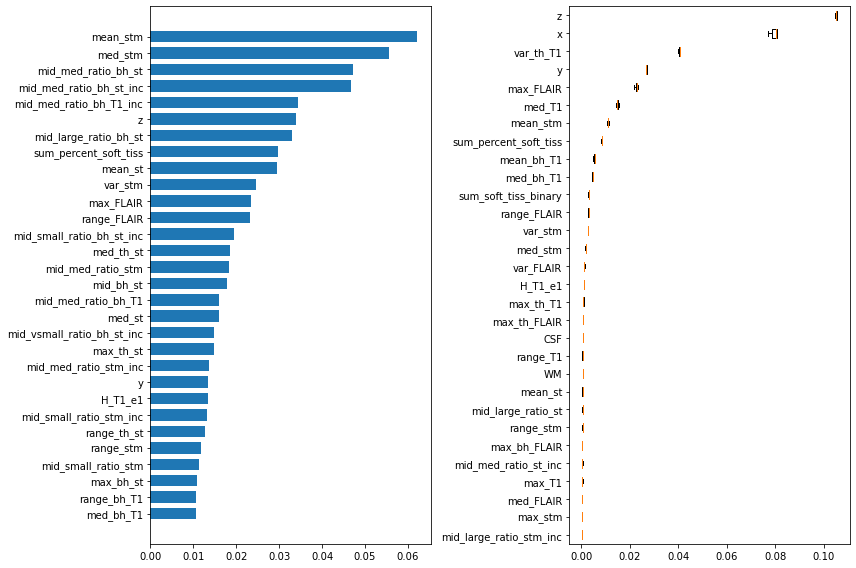

In [84]:
# Feature Importance
result = permutation_importance(clf, dataset_pd, Y_train, n_repeats=3, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices[-30:], clf.feature_importances_[tree_importance_sorted_idx][-30:], height=0.7)
ax1.set_yticks(tree_indices[-30:])
ax1.set_yticklabels(dataset_pd.columns[tree_importance_sorted_idx][-30:])
ax2.boxplot(
    result.importances[perm_sorted_idx][-30:].T,
    vert=False,
    labels=dataset_pd.columns[perm_sorted_idx][-30:],
)
fig.tight_layout()
plt.show()

In [89]:
dataset_combined = dataset_pd.copy()
dataset_combined['Lacune'] = Y_train
dataset_combined.tail()

,min_T1,med_T1,mid_T1,mid_vsmall_ratio_T1,mid_small_ratio_T1,mid_med_ratio_T1,mid_large_ratio_T1,mid_vsmall_ratio_T1_inc,mid_small_ratio_T1_inc,mid_med_ratio_T1_inc,...,x,y,z,WMH_x,WMH_y,WMH_z,CSF,GM,WM,Lacune
33877,6324.0,0.015723,0.320207,0.370022,1.107662,0.972679,0.920756,1.048955,1.092953,0.980617,...,180.0,131.0,33.0,157.0,118.0,135.0,0.000000,0.000036,0.000036,0
33878,6324.0,0.003988,0.160907,0.149905,0.946845,1.041848,0.989607,0.806200,0.953178,1.029088,...,157.0,123.0,15.0,89.0,60.0,71.0,0.000000,0.000000,0.000000,0
33879,6324.0,0.013187,0.100276,0.076475,0.987560,0.997221,1.053480,0.982673,0.989098,0.998043,...,121.0,95.0,28.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,0
33880,6324.0,0.007556,0.226674,0.322061,0.951552,0.986670,1.097390,1.204713,0.957350,0.990582,...,149.0,143.0,32.0,100.0,67.0,103.0,0.164340,0.124188,0.124188,0
33881,6324.0,0.018285,0.232922,0.258761,0.993898,1.011173,1.091093,1.212878,0.994656,1.007836,...,83.0,136.0,120.0,0.0,0.0,0.0,0.275072,0.174092,0.174092,0


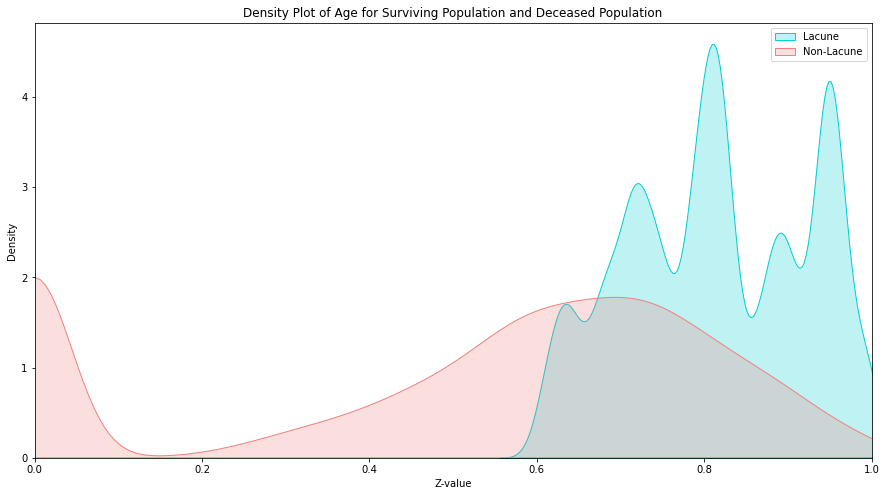

In [95]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_combined["max_stm"][dataset_combined.Lacune == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset_combined["max_stm"][dataset_combined.Lacune == 0], color="lightcoral", shade=True)
plt.legend(['Lacune', 'Non-Lacune'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Z-value')
plt.xlim(0,1)
plt.show()

In [76]:
tree_indices

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecate

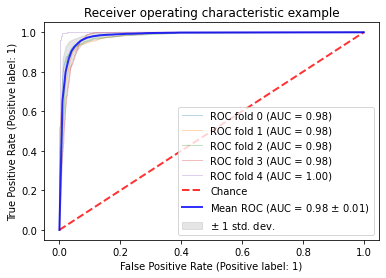

In [38]:
# #############################################################################
# Classification and ROC analysis
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define cv
cv_splits = [(np.concatenate([cv_2_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_1_idx), 
             (np.concatenate([cv_1_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_2_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_4_idx, cv_5_idx]), cv_3_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_5_idx]), cv_4_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_4_idx]), cv_5_idx)]


# Run classifier with cross-validation and plot ROC curves
classifier = RandomForestClassifier(criterion = "gini", n_estimators = 20, min_samples_leaf = 9, min_samples_split = 2, bootstrap = True, max_features =20, oob_score = True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv_splits):
    classifier.fit(dataset[train],Y_train[train])
    viz = plot_roc_curve(classifier, dataset[test], Y_train[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.79438938 0.20561062]
 [0.72106012 0.27893988]
 [0.75649287 0.24350713]
 ...
 [1.         0.        ]
 [0.94307692 0.05692308]
 [1.         0.        ]]
Threshold value is: 0.15136104636104636


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.15054155 0.84945845]
 [0.13070028 0.86929972]
 [0.21304563 0.78695437]
 ...
 [1.         0.        ]
 [0.95162338 0.04837662]
 [1.         0.        ]]
Threshold value is: 0.20880952380952378


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.70416667 0.29583333]
 [0.78668831 0.21331169]
 [0.70454545 0.29545455]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.11538461538461538


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.32784188 0.67215812]
 [0.39193279 0.60806721]
 [0.27831591 0.72168409]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.98928571 0.01071429]]
Threshold value is: 0.1437979422538246


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.06175439 0.93824561]
 [0.05848485 0.94151515]
 [0.10582407 0.89417593]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.42247313988693297


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.82690271 0.17309729]
 [0.81551606 0.18448394]
 [0.8013311  0.1986689 ]
 ...
 [1.         0.        ]
 [0.946      0.054     ]
 [1.         0.        ]]
Threshold value is: 0.1448135198135198


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.13612637 0.86387363]
 [0.02408425 0.97591575]
 [0.03940476 0.96059524]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.96105263 0.03894737]]
Threshold value is: 0.16107226107226108


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.65242083 0.34757917]
 [0.61551606 0.38448394]
 [0.70052689 0.29947311]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.14137835848362162


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.4072012  0.5927988 ]
 [0.41347489 0.58652511]
 [0.45979437 0.54020563]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.1536401098901099


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.00416667 0.99583333]
 [0.02145022 0.97854978]
 [0.03821429 0.96178571]
 ...
 [1.         0.        ]
 [0.91631579 0.08368421]
 [1.         0.        ]]
Threshold value is: 0.407288961038961


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.88391026 0.11608974]
 [0.86740847 0.13259153]
 [0.79717265 0.20282735]
 ...
 [1.         0.        ]
 [0.94353147 0.05646853]
 [1.         0.        ]]
Threshold value is: 0.18504516317016315


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.11322115 0.88677885]
 [0.00662393 0.99337607]
 [0.02547138 0.97452862]
 ...
 [1.         0.        ]
 [0.94230769 0.05769231]
 [1.         0.        ]]
Threshold value is: 0.19120927318295738


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.46961527 0.53038473]
 [0.53405971 0.46594029]
 [0.5091986  0.4908014 ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.2224310776942356


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.33374608 0.66625392]
 [0.32030057 0.67969943]
 [0.43467045 0.56532955]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.17157655502392344


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.         1.        ]
 [0.02467949 0.97532051]
 [0.04134615 0.95865385]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.49503205128205136


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.68258754 0.31741246]
 [0.80005952 0.19994048]
 [0.80961287 0.19038713]
 ...
 [1.         0.        ]
 [0.98666667 0.01333333]
 [1.         0.        ]]
Threshold value is: 0.15332242667181814


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.04347826 0.95652174]
 [0.01269231 0.98730769]
 [0.00769231 0.99230769]
 ...
 [0.98125    0.01875   ]
 [0.99736842 0.00263158]
 [0.99583333 0.00416667]]
Threshold value is: 0.262447395202687


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.59986865 0.40013135]
 [0.55569444 0.44430556]
 [0.64066697 0.35933303]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.20126809056956113


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.50380096 0.49619904]
 [0.50380096 0.49619904]
 [0.49285714 0.50714286]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.98181818 0.01818182]]
Threshold value is: 0.20646994134897353


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.         1.        ]
 [0.06787879 0.93212121]
 [0.0229798  0.9770202 ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.43658445987090494


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.6293648  0.3706352 ]
 [0.7194499  0.2805501 ]
 [0.77198926 0.22801074]
 ...
 [1.         0.        ]
 [0.98809524 0.01190476]
 [1.         0.        ]]
Threshold value is: 0.1784722222222222


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.09652778 0.90347222]
 [0.08719807 0.91280193]
 [0.1607695  0.8392305 ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.17608861726508787


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.66785714 0.33214286]
 [0.71785714 0.28214286]
 [0.65333333 0.34666667]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.1771103896103896


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.31286477 0.68713523]
 [0.2746047  0.7253953 ]
 [0.42503852 0.57496148]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.2165001665001665


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.04562937 0.95437063]
 [0.10757021 0.89242979]
 [0.04688329 0.95311671]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.44937660438976224


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.83682084 0.16317916]
 [0.86195682 0.13804318]
 [0.90602176 0.09397824]
 ...
 [1.         0.        ]
 [0.91785714 0.08214286]
 [1.         0.        ]]
Threshold value is: 0.17727292730153144


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.13603989 0.86396011]
 [0.06296296 0.93703704]
 [0.07843915 0.92156085]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.98461538 0.01538462]]
Threshold value is: 0.21889512534249372


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.63288867 0.36711133]
 [0.66138517 0.33861483]
 [0.72699965 0.27300035]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.14928571428571427


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.38827538 0.61172462]
 [0.41452538 0.58547462]
 [0.53099345 0.46900655]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.1340034965034965


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.01923077 0.98076923]
 [0.01923077 0.98076923]
 [0.06923077 0.93076923]
 ...
 [1.         0.        ]
 [0.92307692 0.07692308]
 [1.         0.        ]]
Threshold value is: 0.4742321883472999


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.75       0.25      ]
 [0.66372958 0.33627042]
 [0.84848485 0.15151515]
 ...
 [1.         0.        ]
 [0.98695652 0.01304348]
 [1.         0.        ]]
Threshold value is: 0.16727564102564102


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.07261905 0.92738095]
 [0.06428571 0.93571429]
 [0.07652244 0.92347756]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.20674546214019895


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.71782609 0.28217391]
 [0.67972169 0.32027831]
 [0.75746596 0.24253404]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.16923076923076924


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.30876436 0.69123564]
 [0.30264548 0.69735452]
 [0.41383013 0.58616987]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.97777778 0.02222222]]
Threshold value is: 0.20206175403543827


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.07074315 0.92925685]
 [0.11357143 0.88642857]
 [0.00357143 0.99642857]
 ...
 [1.         0.        ]
 [0.97777778 0.02222222]
 [1.         0.        ]]
Threshold value is: 0.4488170133100473


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.82162855 0.17837145]
 [0.73556111 0.26443889]
 [0.87087995 0.12912005]
 ...
 [1.         0.        ]
 [0.98817935 0.01182065]
 [1.         0.        ]]
Threshold value is: 0.1619047619047619


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.05       0.95      ]
 [0.05       0.95      ]
 [0.11956522 0.88043478]
 ...
 [1.         0.        ]
 [0.95       0.05      ]
 [1.         0.        ]]
Threshold value is: 0.199114439763527


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.80957265 0.19042735]
 [0.80909091 0.19090909]
 [0.72777778 0.27222222]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.1602173913043478


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.42945715 0.57054285]
 [0.42269244 0.57730756]
 [0.60908169 0.39091831]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.17047619047619048


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.05       0.95      ]
 [0.04119048 0.95880952]
 [0.01287879 0.98712121]
 ...
 [1.         0.        ]
 [0.98392857 0.01607143]
 [1.         0.        ]]
Threshold value is: 0.4075177174975562


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.76077616 0.23922384]
 [0.81617133 0.18382867]
 [0.66955851 0.33044149]
 ...
 [1.         0.        ]
 [0.94212454 0.05787546]
 [1.         0.        ]]
Threshold value is: 0.17665991902834008


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.07019231 0.92980769]
 [0.02019231 0.97980769]
 [0.0928228  0.9071772 ]
 ...
 [0.99615385 0.00384615]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.19033653846153847


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.59666667 0.40333333]
 [0.53075758 0.46924242]
 [0.57119337 0.42880663]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.11666666666666665


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.4982509  0.5017491 ]
 [0.40402013 0.59597987]
 [0.50507661 0.49492339]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.20362359862359863


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.00769231 0.99230769]
 [0.         1.        ]
 [0.         1.        ]
 ...
 [1.         0.        ]
 [0.93666667 0.06333333]
 [1.         0.        ]]
Threshold value is: 0.42142857142857143


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.78523077 0.21476923]
 [0.84125189 0.15874811]
 [0.93975524 0.06024476]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.1441666666666667


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.06988636 0.93011364]
 [0.01988636 0.98011364]
 [0.07018048 0.92981952]
 ...
 [1.         0.        ]
 [0.975      0.025     ]
 [1.         0.        ]]
Threshold value is: 0.1208030303030303


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.48669839 0.51330161]
 [0.48690476 0.51309524]
 [0.49560041 0.50439959]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.18181818181818182


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.42201128 0.57798872]
 [0.49911654 0.50088346]
 [0.56068115 0.43931885]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Threshold value is: 0.15613553113553114


C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ellen\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.13522727 0.86477273]
 [0.10660673 0.89339327]
 [0.         1.        ]
 ...
 [1.         0.        ]
 [0.97884769 0.02115231]
 [1.         0.        ]]
Threshold value is: 0.448090652626943
0.22759467722454807
[array([0.        , 0.70416667, 0.86875   , 0.90729167, 0.94166667,
       0.95416667, 0.9625    , 0.97604167, 0.978125  , 0.98229167,
       0.984375  , 0.98645833, 0.98645833, 0.98645833, 0.9875    ,
       0.98854167, 0.98854167, 0.98854167, 0.98958333, 0.990625  ,
       0.990625  , 0.99166667, 0.99270833, 0.99479167, 0.99479167,
       0.99479167, 0.99583333, 0.99583333, 0.99583333, 0.99583333,
       0.996875  , 0.996875  , 0.99791667, 0.99791667, 0.99791667,
       0.99791667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.   

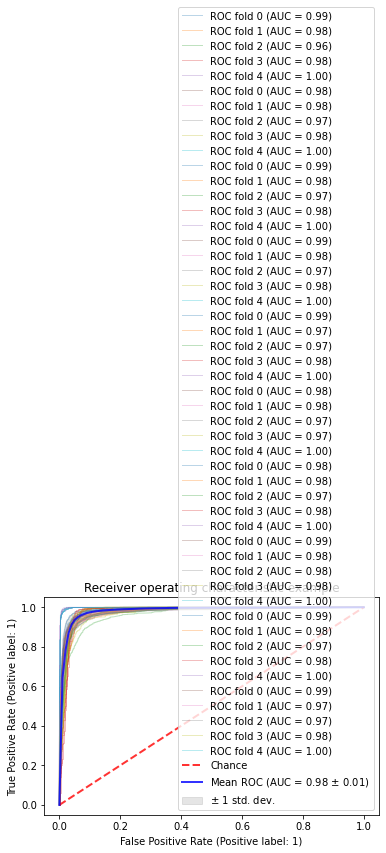

In [41]:
# #############################################################################
# Classification and ROC analysis
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define cv
cv_splits = [(np.concatenate([cv_2_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_1_idx), 
             (np.concatenate([cv_1_idx, cv_3_idx, cv_4_idx, cv_5_idx]), cv_2_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_4_idx, cv_5_idx]), cv_3_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_5_idx]), cv_4_idx), 
             (np.concatenate([cv_1_idx, cv_2_idx, cv_3_idx, cv_4_idx]), cv_5_idx)]


# Run classifier with cross-validation and plot ROC curves
classifier = RandomForestClassifier(criterion = "gini", n_estimators = 20, min_samples_leaf = 9, min_samples_split = 2, max_features =20, oob_score = True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
threshold = []

fig, ax = plt.subplots()
for j in range(0,10):
    for i, (train, test) in enumerate(cv_splits):
        classifier.fit(dataset[train],Y_train[train])
        viz = plot_roc_curve(classifier, dataset[test], Y_train[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        #y_pred_scores = (classifier.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
        y_pred_scores = classifier.predict_proba(dataset[test])
        print(y_pred_scores)
        fpr, tpr, thresholds = roc_curve(Y_train[test], y_pred_scores[:, -1])
        # abs value?
        optimal_idx = np.argmax(tpr-fpr)
        optimal_threshold = thresholds[optimal_idx]
        threshold.append(optimal_threshold)
        print("Threshold value is:", optimal_threshold)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

print(np.mean(threshold))
print(tprs)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [19]:
print(y_pred_scores[:, -1])

[0.25830371 0.21029762 0.24875    ... 0.         0.05909091 0.        ]


In [3]:
import os
import re
import nibabel as nib
tissue_maps = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\tissue_prob_maps.tar\tissue_prob_maps'

In [4]:
def probability_tissue_maps(tissue_maps):
    CSF = []
    WM = []
    GM = []
    for file in os.listdir(tissue_maps):
        if file.endswith(".nii.gz"):
            if file.find("CSF"):
                Data_list = []
                file_id = int(re.search(r'\d+', file)[0])
                imgpath = os.path.join(tissue_maps, file)
                img = nib.load(imgpath)
                data = img.get_fdata()
                Data_list.append(file_id)
                Data_list.append(data)
                CSF.append(Data_list)
            if file.find("GM"):
                Data_list = []
                file_id = int(re.search(r'\d+', file)[0])
                imgpath = os.path.join(tissue_maps, file)
                img = nib.load(imgpath)
                data = img.get_fdata()
                Data_list.append(file_id)
                Data_list.append(data)
                GM.append(Data_list)
            if file.find("WM"):
                Data_list = []
                file_id = int(re.search(r'\d+', file)[0])
                imgpath = os.path.join(tissue_maps, file)
                img = nib.load(imgpath)
                data = img.get_fdata()
                Data_list.append(file_id)
                Data_list.append(data)
                WM.append(Data_list)
        break
    return CSF, WM, GM
CSF, WM, GM = probability_tissue_maps(tissue_maps)

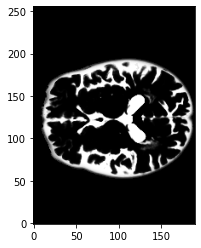

In [9]:
input_image = WM[0][1][:, 150, :]*255
input_image = input_image.astype('uint8')
plt.imshow(input_image, cmap="gray", origin="lower")
plt.show()

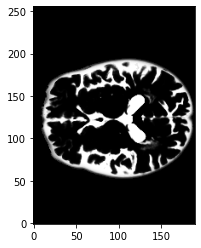

In [10]:
input_image = GM[0][1][:, 150, :]*255
input_image = input_image.astype('uint8')
plt.imshow(input_image, cmap="gray", origin="lower")
plt.show()

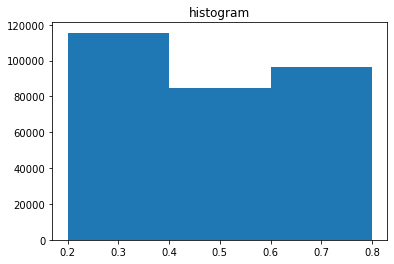

In [44]:
from matplotlib import pyplot as plt 
flat_array = np.ravel(GM[0][1])
np.histogram(flat_array,bins = [0.2, 0.4, 0.6, 0.8]) 
hist,bins = np.histogram(flat_array,bins = [0,0.2, 0.4, 0.6, 0.8]) 
plt.hist(flat_array, bins = [0.2, 0.4, 0.6, 0.8]) 
plt.title("histogram") 
plt.show()